# Understanding of the Perceptron

In this tutorial, you will be learing the perceptron algorithm. After brief history of the perceptron algorithm and its importance in Artificial Intelligence is explained, you will learn how to implement the perceptron algorithm from scratch.


### History of the Perceptron

The perceptron algorithm is one of the most important and oldest algorithm in Artificial Intelligence. There has not been any prominent book related to Artificial Intelligence and Machine learning in which the perceptron algortihm has not been explained thoroughly, such as
    <a href="http://aima.cs.berkeley.edu/">
      Artificial Intelligence: A Modern Approach</a>,
    <a href="https://work.caltech.edu/telecourse.html">
       Learning From Data</a>,
    <a href="https://work.caltech.edu/telecourse.html">
       Pattern Recognition and Machine Learning</a>,
    <a href="https://mitpress.mit.edu/books/introduction-machine-learning">
       Introduction to Machine Learning</a>.

###  The Perceptron

Consider a binary classification problem with $X = \mathbb{R}^d$ and 
$Y=\left\{-1,+1\right\}$. The hypothesis space $\textbf{H}$ of the perceptron consists of all functions of the form <br><br>
$ h : \textbf{x} \longmapsto sign\left\{ b + \sum_{n=i}^{d} w_i x_i \right\}$, where sign(s) =$\left\{\textrm{ +1 if s > 0, otherwise -1 }\right\}$.
          


#### The Perceptron Convergence Theorem

The perceptron covergence theorem says that the learning algorithm can adjust the connection strengths of a perceptron to match any input data, $\textbf{provided such a match exists}$. This means that,

The perceptron learning rule converges to a perfect linear separator when the data points are linearly separpable. 
As it is seen in the an illustration of AND, OR gates,
the perceptron learning rule finds a perfect linear separator in AND and OR gates, while it fails in XOR gate.

<br>
The perceptron algorithm updates its weight/coefficient vector if current weight vector leads to a missclassifaction fo the training example or more specifcally as follows:<br><br>
$$\textrm{if }y_i (w_t\cdot x_t) < 0 \textrm{, then: }$$

$$w_{t+1}\leftarrow w_{t}+ y_t x_t$$ <br>
Consequently, the solution is always a linear combination of the training instances:
$\textbf{w} = \sum_{i} a_i y_i x_i$,$ $ with positive coefficients $a_i>0$. This notion plays also important role in
<a href="https://youtu.be/_PwhiWxHK8o?t=27m58s">Kernalization of SVM</a>. More specifically, The decision function can be expressed in terms of a dual representation, since the training instances only appear inside dot products: <br>

$$f(x)=(w_t\cdot x_t) = \sum_{i} \alpha _i y_i (x_i\cdot x)$$







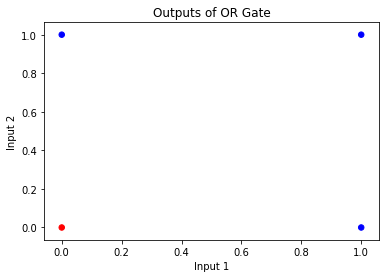

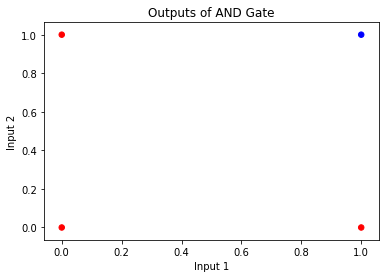

In [142]:
def displayOR_gate():
    import numpy as np
    import matplotlib.pyplot as plt
    
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 1])
    col = np.where(Y == 1, 'b', 'r')
    plt.scatter(X[:, 0], X[:, 1], c=col, s=30)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Outputs of OR Gate')
    plt.axis('tight')
    plt.show()
    
def displayAND_gate():
    import numpy as np
    import matplotlib.pyplot as plt
    
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 0, 0, 1])
    col = np.where(Y == 1, 'b', 'r')
    plt.scatter(X[:, 0], X[:, 1], c=col, s=30)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Outputs of AND Gate')
    plt.axis('tight')
    plt.show()
    



displayOR_gate()
displayAND_gate()

As both plots show that both datasets are linearly separable. However in the below, one can see that perceptron algorithm can not solve XOR Gate.


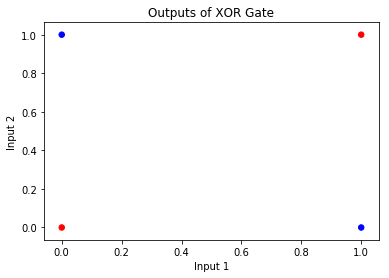

In [143]:

def displayXOR_gate():
    import numpy as np
    import matplotlib.pyplot as plt
    
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    col = np.where(Y == 1, 'b', 'r')
    plt.scatter(X[:, 0], X[:, 1], c=col, s=30)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Outputs of XOR Gate')
    plt.axis('tight')
    plt.show()
    
    
    
displayXOR_gate()

In [144]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [145]:
class Perceptron():
    def __init__( self ):
        self.weights = np.random.rand(3)
    def respond( self, x ):
        #w( t )+(y ( y )−ŷ x( t )↦w(t+1)w( t )+(y ( y )−y^x( t )↦w(t+1)
        prediction = np.dot(self.weights, x)
        if prediction > 0:
            return 1
        else:
            return 0
        
    def updateWeights( self, x, y, prediction ):
        self.weights = self.weights + (y - prediction) * x

    def train( self, X, Y ):
        learned = False
        iteration = 0
        #fig, ax = plt.subplots()

        while iteration < 1000:
            globalError = 0
            for i in range(0, X.shape[ 0 ]):
                prediction = self.respond(X[ i ])
                if prediction != Y[ i ]:
                    self.updateWeights(X[ i ], Y[ i ], prediction)
                    globalError += 1
                    #self.drawHyperplane(X, Y,iteration)
                iteration += 1

            if globalError == 0:
                learned = True
                break
                #self.drawHyperplane(X, Y,iteration)
                
        if learned == False:
            print("The perceptron algorithm could not converge!")
                       
    def drawHyperplane( self, X, Y,iteration):

        a = - self.weights[1] / self.weights[2]
        xx = np.linspace(-0.1, 1.1,num=100)
        yy = a * xx - self.weights[0] / self.weights[2]
        col = np.where(Y > 0, 'b', 'r')
        plt.cla()
        plt.scatter(X[:, 1], X[:, 2], c=col, s=10)
        plt.plot(xx, yy, 'k-')
        plt.title(iteration)
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.axis('tight')
        plt.draw()
        plt.pause(0.1)
    

In [146]:
def displayDatapoints( X, Y ):
    col = np.where(Y > 0, 'b', 'r')
    plt.scatter(X[ :, 1 ], X[ :, 2 ], c=col, s=10)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.axis('tight')
    plt.show()

In [147]:
def Test( p, X, Y,gate):
    p.drawHyperplane(X,Y,gate)
    for i in range(0, X.shape[ 0 ]):
        print("Prediction ", p.respond(X[ i ]))
        print("Truth    ", Y[ i ])

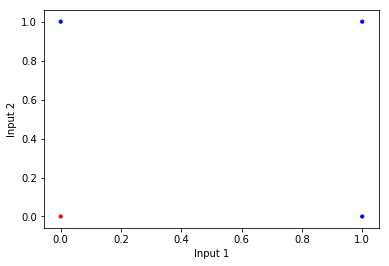

In [148]:

##Linearly sepearable Data
#First colum is for the bias term
OR_Gate_Input = np.array([[1,0, 0], [1,0, 1], [1,1, 0], [1, 1, 1]])
OR_Gate_Output = np.array([0, 1, 1, 1])
displayDatapoints(OR_Gate_Input, OR_Gate_Output)


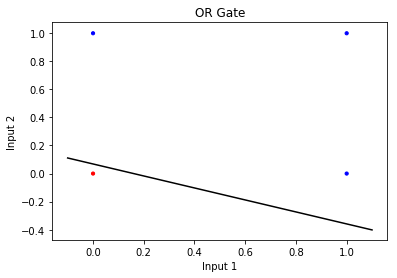

Prediction  0
Truth     0
Prediction  1
Truth     1
Prediction  1
Truth     1
Prediction  1
Truth     1


In [149]:
p = Perceptron()
p.train(OR_Gate_Input, OR_Gate_Output)
Test(p, OR_Gate_Input, OR_Gate_Output,"OR Gate")

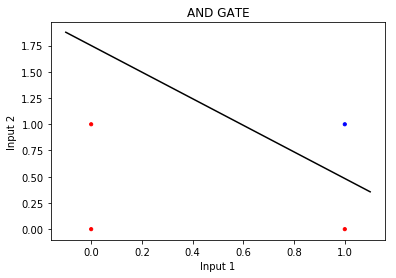

Prediction  0
Truth     0
Prediction  0
Truth     0
Prediction  0
Truth     0
Prediction  1
Truth     1


In [150]:
p = Perceptron()
AND_Gate_Input = np.array([[1,0, 0], [1,0, 1], [1,1, 0], [1,1, 1]])
AND_Gate_Output = np.array([0, 0, 0, 1])
p.train(AND_Gate_Input, AND_Gate_Output)
Test(p, AND_Gate_Input, AND_Gate_Output,"AND GATE")

The perceptron algorithm could not converge!


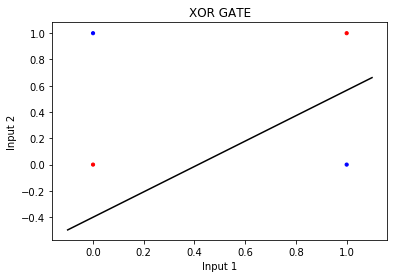

Prediction  1
Truth     0
Prediction  1
Truth     1
Prediction  0
Truth     1
Prediction  1
Truth     0


In [151]:
p = Perceptron()
XOR_Gate_Input = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
XOR_Gate_Output = np.array([0, 1, 1, 0])
p.train(XOR_Gate_Input, XOR_Gate_Output)
Test(p, XOR_Gate_Input, XOR_Gate_Output,"XOR GATE")

### SVM with Polynomial Kernel

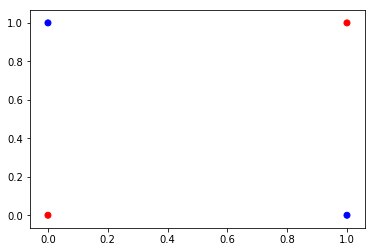

In [152]:
import pandas as pd
from sklearn import svm

X = pd.DataFrame(np.array([[0, 0], [ 0, 1], [1, 0], [1, 1]]))
y = pd.Series(XOR_Gate_Output)

col = np.where(y>0,'b','r')

plt.scatter(X.iloc[:,0],X.iloc[:,1],c=col,)
plt.show()


In [153]:
def plot(kernel,C):
    model = svm.SVC(kernel=kernel)

    model.fit(X, y)
    plt.scatter(X.iloc[ :, 0], X.iloc[ :, 1 ], c=col, s=30, cmap=plt.cm.Paired)
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[ 0 ], xlim[ 1 ], 30)
    yy = np.linspace(ylim[ 0 ], ylim[ 1 ], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([ XX.ravel(), YY.ravel() ]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[ -1, 0, 1 ], alpha=0.5, linestyles=[ '--', '-', '--' ])
    # plot support vectors
    ax.scatter(model.support_vectors_[ :, 0 ], model.support_vectors_[ :, 1 ], linewidth=1, facecolors='none')
    plt.show()

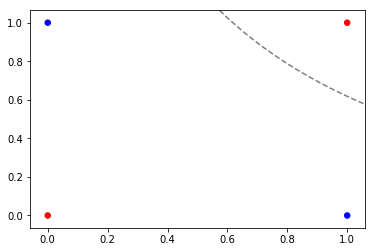

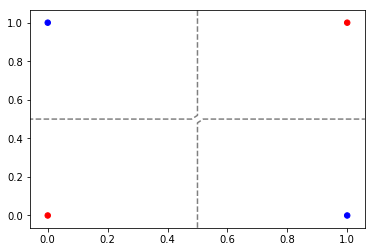

In [154]:
#plot("linear", 0.5)
plot("poly",0.2)
plot("rbf", 1)

